# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**{Chikezie Jude Ezenna**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

## Problem statement

* To prevent climate change and ensure sustainability, the world is moving toward the usage of renewable energy resources. Renewable energy sources will also ensure a steady supply of energy. As a result, new markets, enterprises, and job opportunities will emerge, providing greater options for individuals to earn a living and elevate themselves, their families, and their communities out of poverty. Businesses and the economy as a whole suffer from a lack of reliable power supply.

* Renewable energy sources accounted for 43% of all electricity produced in Spain in the year 2020. As a result, the government is considering increasing infrastructure spending. However, they will need information on the country's renewable resource and fossil fuel energy generating trends and patterns in order to do so..

* As aspiring data scientists, we were charged with creating a model that would help estimate the three-hourly load shortfall in Spain precisely. This information will aid the government in determining how much infrastructure spending should be increased.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages



In [ ]:
# Libraries for data loading, data manipulation, and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn import metrics  # Library for evaluating model performance metrics
from sklearn.model_selection import train_test_split  # Library for splitting data into training and testing sets
from sklearn.linear_model import *  # Additional linear regression models (e.g., Lasso, Ridge)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Metrics for evaluating regression models
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression model
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regression model
from xgboost import XGBRegressor  # XGBoost regression model
from sklearn.preprocessing import StandardScaler  # Library for feature scaling
from IPython.display import Image  # Library for displaying images in Jupyter Notebook

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42  # A constant value for reproducibility of results

import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages


In [2]:
!pip install xgboost


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
# load the data
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

print(f'Shape of train data: {df_train.shape}')
print(f'Shape of test data: {df_test.shape}')

In [4]:
df_train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

**Observations:**

1. There are 49 columns and 8763 rows for the training data.
2. There are 48 columns and 2920 rows for the testing data, column is less than one so as to hide the target column "load_shortfall_3h"
3. We have an unnamed column having the same index value as seen above, this column is insignificant to our use case

In [48]:
df_test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)

   
| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
# look at data statistics
df_train.describe().T

count          mean           std          min  \
Unnamed: 0            8763.0   4381.000000   2529.804538     0.000000   
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Unnamed: 0            2190.500000   4381.000000   6571.500000  8.762000e+03  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.0000

**Observation**

Looking at our data, we can infer the following:
   - We can see from the **Mean** that some of the columns, such as Barcelona Pressure, Bilbao Pressure, Valencia Pressure, and so on, have extremely high values that are outside of the range. 
   - Their maximum values, which would suggest the existence of outliers, likewise demonstrate this..
   

We would have to confirm this in our next analysis




### Checking for Outliers

In [7]:
# Checking for the Presence of Outliers with Kurtosis
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

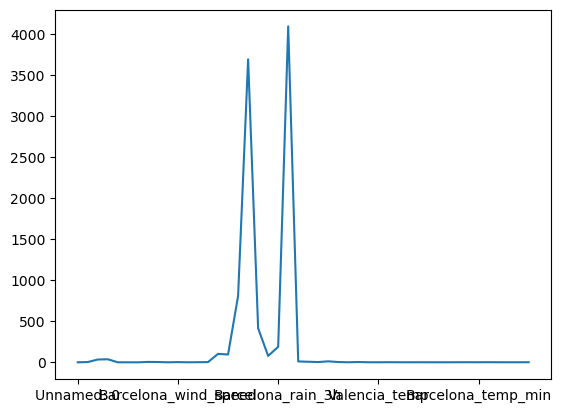

In [8]:
df_train.kurtosis().plot();

**Observation**

* Below are features with large numbers of outliers as shown by **kurtosis > 3**; 
Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.
* The outliers observed in Barcelona_pressure are definitely due to some sort of error, as a pressure of 3687.564230 is too high. The maximum pressure recorded in history is 1,085.7, and the maximum pressure for the other cities in the dataset are also below this value. (The maximum pressure ever recorded on Earth was observed in Siberia, Russia. On December 31, 1968, in the town of Tosontsengel, Mongolia, a surface-level air pressure of 1,085.7 hectopascals (hPa) )
* This value can be replaced or dropped during data engineering.
* Valencia_wind_speed has a maximum of 52, there is also something wrong with that value. The highest wind speed recorded in history is 20.This value should also be replaced or dropped.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we can leave them.

It appears none of our predictors have a linear relationship with the target variable.

In [9]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [10]:
df_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

**Observation**
* Almost all columns are numerical(float) aside from time, seville_pressure, and valencia_wind_deg
*  Since this is a regression (numeric) data, thus requires us to convert to numerical values

In [11]:
#To check missing observation
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Observation

1. Valencia_pressure has 2068 empty obervations. We will need to fill them up.

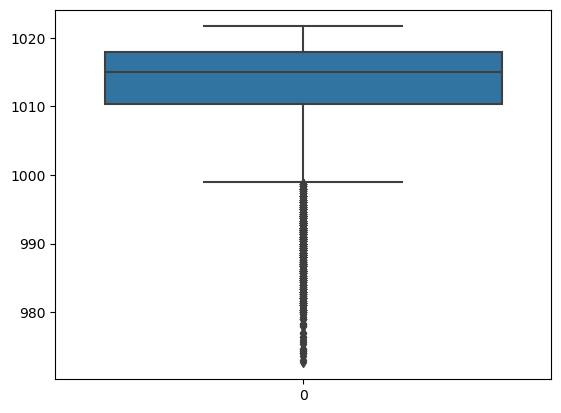

In [12]:
sns.boxplot(df_train["Valencia_pressure"]);

In [13]:
print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())


Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.0514065222798
Median
1015.0


## Evaluate correlation

In [14]:
# evaluate correlation
df_train.corr()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

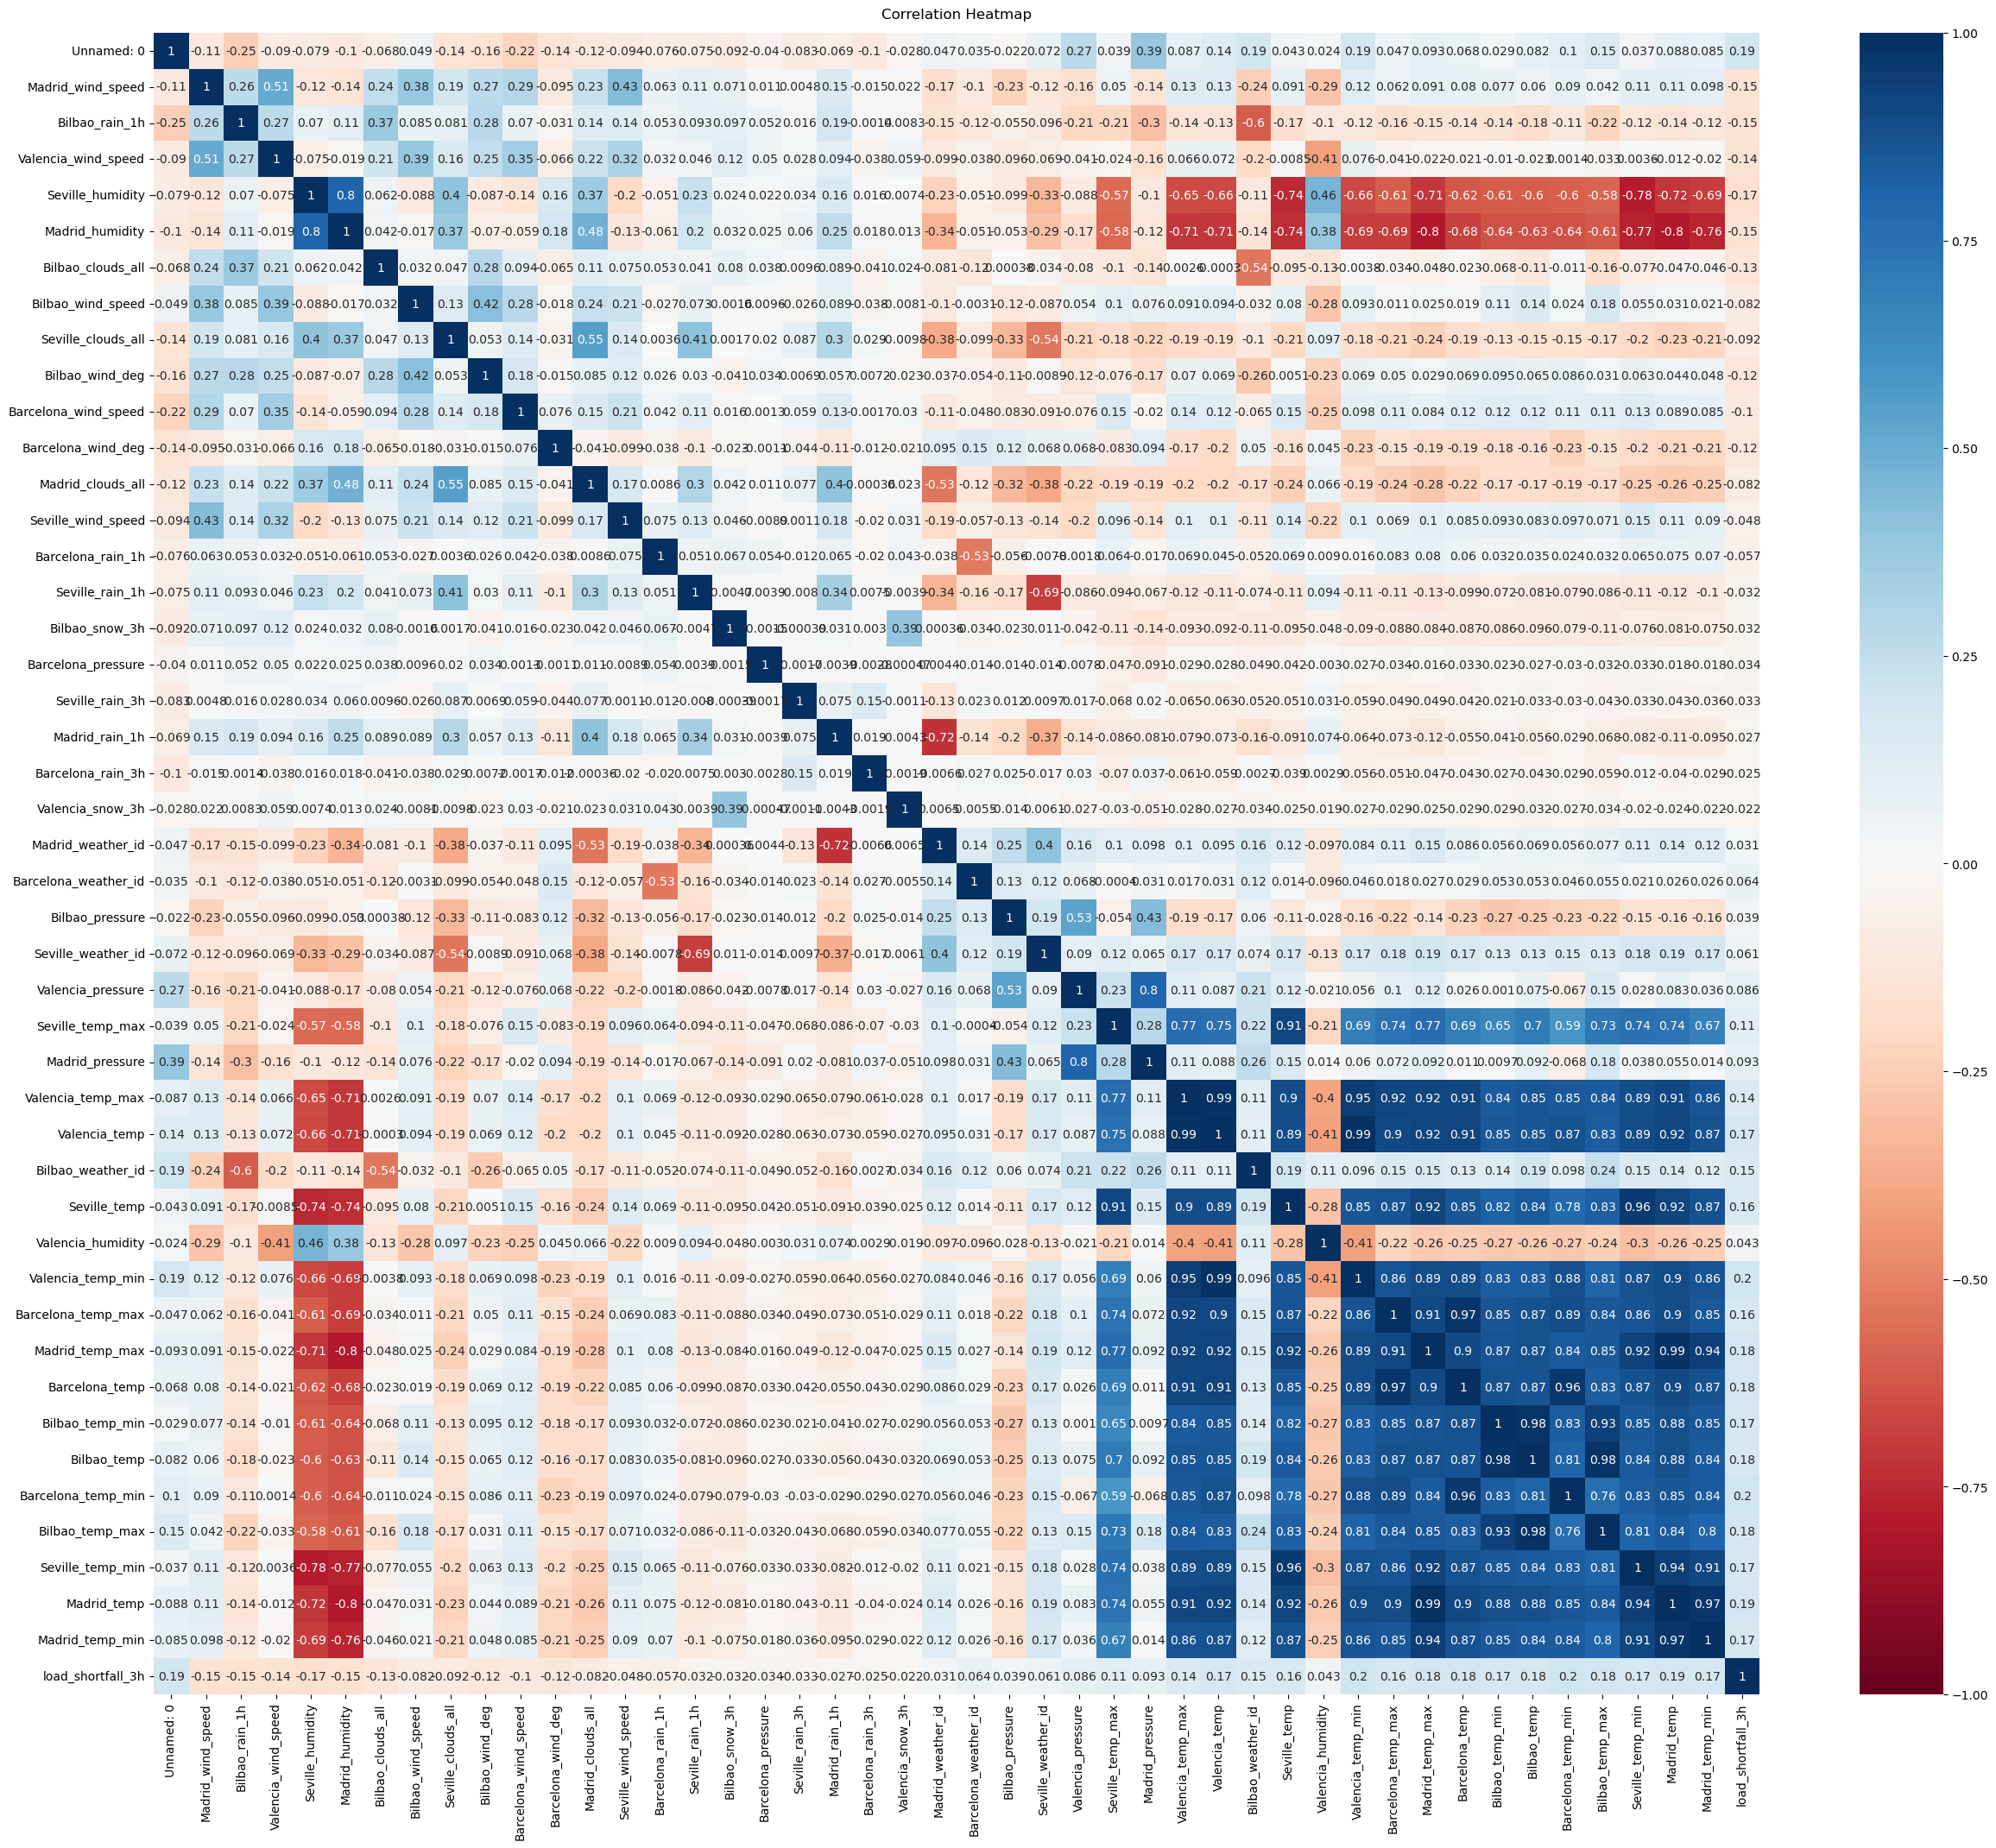

In [15]:
# plot a heatmap to show correlation between our numeric variables
plt.figure(figsize=(30,25))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True,cmap="RdBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

* First, we can easily tell the presence of high correlation (in blue) between features on the heatmap at the bottom right corner of our graph
* A breakdown of handling such occurence will be discussed in the feature engineering section of the notebook
* It is important to consider this step when choosing the best features which in turn would result to an improvement of our model.


In [16]:
# Drop highly correlated features if the correlation coefficient > 80%

# # Create correlation matrix
corr_matrix = df_train.corr().abs()

# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['Valencia_temp',
 'Seville_temp',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min']

**We want to magnify the features with correlection above 80%**

In [17]:
df_corr = df_train[to_drop]

In [18]:
df_corr.corr()

Valencia_temp  Seville_temp  Valencia_temp_min  \
Valencia_temp            1.000000      0.887040           0.985479   
Seville_temp             0.887040      1.000000           0.852492   
Valencia_temp_min        0.985479      0.852492           1.000000   
Barcelona_temp_max       0.901400      0.866389           0.860510   
Madrid_temp_max          0.917820      0.920908           0.893368   
Barcelona_temp           0.914601      0.852651           0.892024   
Bilbao_temp_min          0.847584      0.818454           0.832773   
Bilbao_temp              0.854892      0.839014           0.832393   
Barcelona_temp_min       0.874447      0.779252           0.879687   
Bilbao_temp_max          0.833562      0.828099           0.806606   
Seville_temp_min         0.890915      0.955160           0.871738   
Madrid_temp              0.915753      0.917075           0.897012   
Madrid_temp_min          0.871563      0.868453           0.860347   

                    Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
Valencia_temp                 0.901400         0.917820        0.914601   
Seville_temp                  0.866389         0.920908        0.852651   
Valencia_temp_min             0.860510         0.893368        0.892024   
Barcelona_temp_max            1.000000         0.906248        0.974480   
Madrid_temp_max               0.906248         1.000000        0.900428   
Barcelona_temp                0.974480         0.900428        1.000000   
Bilbao_temp_min               0.854620         0.865596        0.867434   
Bilbao_temp                   0.867268         0.872234        0.865705   
Barcelona_temp_min            0.885911         0.836680        0.964089   
Bilbao_temp_max               0.844563         0.846887        0.831470   
Seville_temp_min              0.862597         0.923481        0.873170   
Madrid_temp                   0.896766         0.988871        0.903143   
Madrid_temp_min               0.847888         0.939147        0.868222   

                    Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
Valencia_temp              0.847584     0.854892            0.874447   
Seville_temp               0.818454     0.839014            0.779252   
Valencia_temp_min          0.832773     0.832393            0.879687   
Barcelona_temp_max         0.854620     0.867268            0.885911   
Madrid_temp_max            0.865596     0.872234            0.836680   
Barcelona_temp             0.867434     0.865705            0.964089   
Bilbao_temp_min            1.000000     0.982936            0.831224   
Bilbao_temp                0.982936     1.000000            0.810785   
Barcelona_temp_min         0.831224     0.810785            1.000000   
Bilbao_temp_max            0.932219     0.981624            0.764031   
Seville_temp_min           0.847007     0.842972            0.831689   
Madrid_temp                0.876185     0.875271            0.853881   
Madrid_temp_min            0.845799     0.838195            0.838985   

                    Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
Valencia_temp              0.833562          0.890915     0.915753   
Seville_temp               0.828099          0.955160     0.917075   
Valencia_temp_min          0.806606          0.871738     0.897012   
Barcelona_temp_max         0.844563          0.862597     0.896766   
Madrid_temp_max            0.846887          0.923481     0.988871   
Barcelona_temp             0.831470          0.873170     0.903143   
Bilbao_temp_min            0.932219          0.847007     0.876185   
Bilbao_temp                0.981624          0.842972     0.875271   
Barcelona_temp_min         0.764031          0.831689     0.853881   
Bilbao_temp_max            1.000000          0.808278     0.843633   
Seville_temp_min           0.808278          1.000000     0.939079   
Madrid_temp                0.843633          0.939079     1.000000   
Madrid_temp_min            0.802041          0.907758     0.973641   

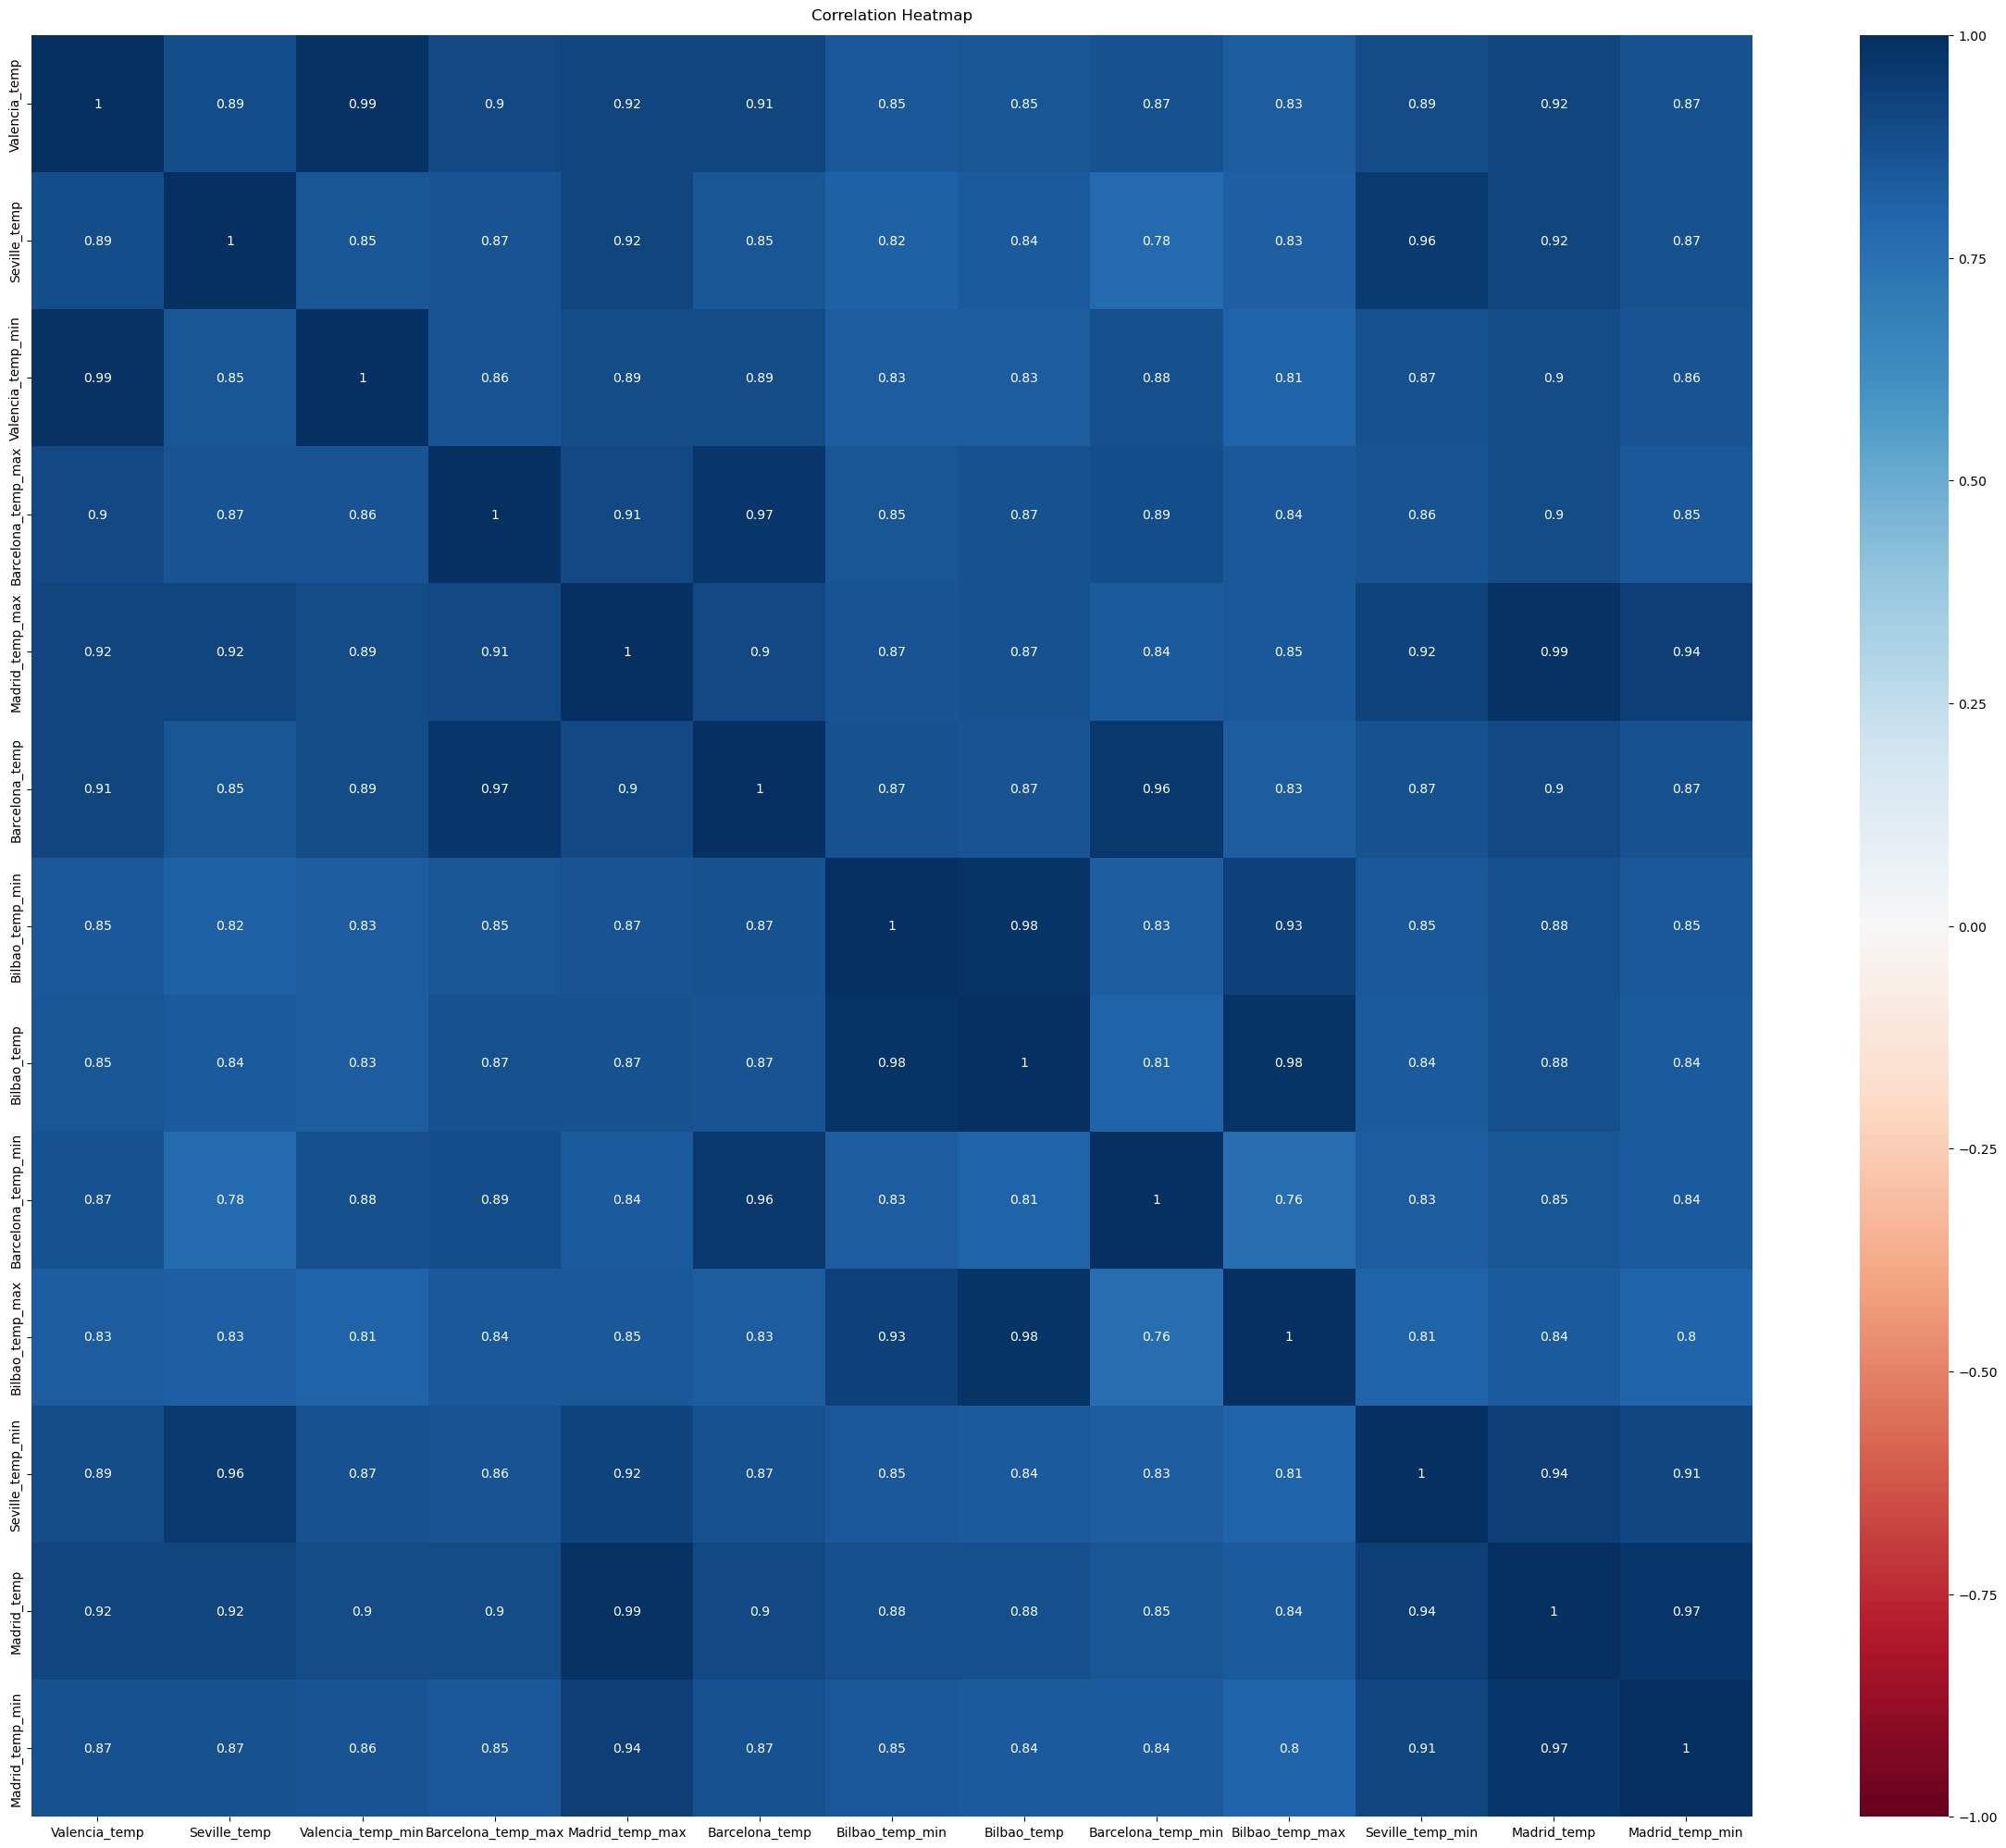

In [19]:

# plot a heatmap to show correlation between our numeric variables
plt.figure(figsize=(30,25))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True,cmap="RdBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Observation**

1. Feature Bilbao_temp_max and Bilbao_temp_min  are direct reflection of the Bilbao_temp.(this applies to all temperature readings from all the regions).
2. The same applies to Barcelona_temp_max,Barcelona_temp_min, Madrid_temp_max, Madrid_temp_min, Seville_temp_min, Valencia_temp_min


### Distribution of weather features based on cities

In [20]:
def weather_distribution(df, city):
    city_list = [col for col in df.columns if city in col and 'max' not in col and 'min' not in col]
    return df[city_list].hist(alpha=0.5, figsize=(20, 14))


array([[<Axes: title={'center': 'Barcelona_wind_speed'}>,
        <Axes: title={'center': 'Barcelona_wind_deg'}>,
        <Axes: title={'center': 'Barcelona_rain_1h'}>],
       [<Axes: title={'center': 'Barcelona_pressure'}>,
        <Axes: title={'center': 'Barcelona_rain_3h'}>,
        <Axes: title={'center': 'Barcelona_weather_id'}>],
       [<Axes: title={'center': 'Barcelona_temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

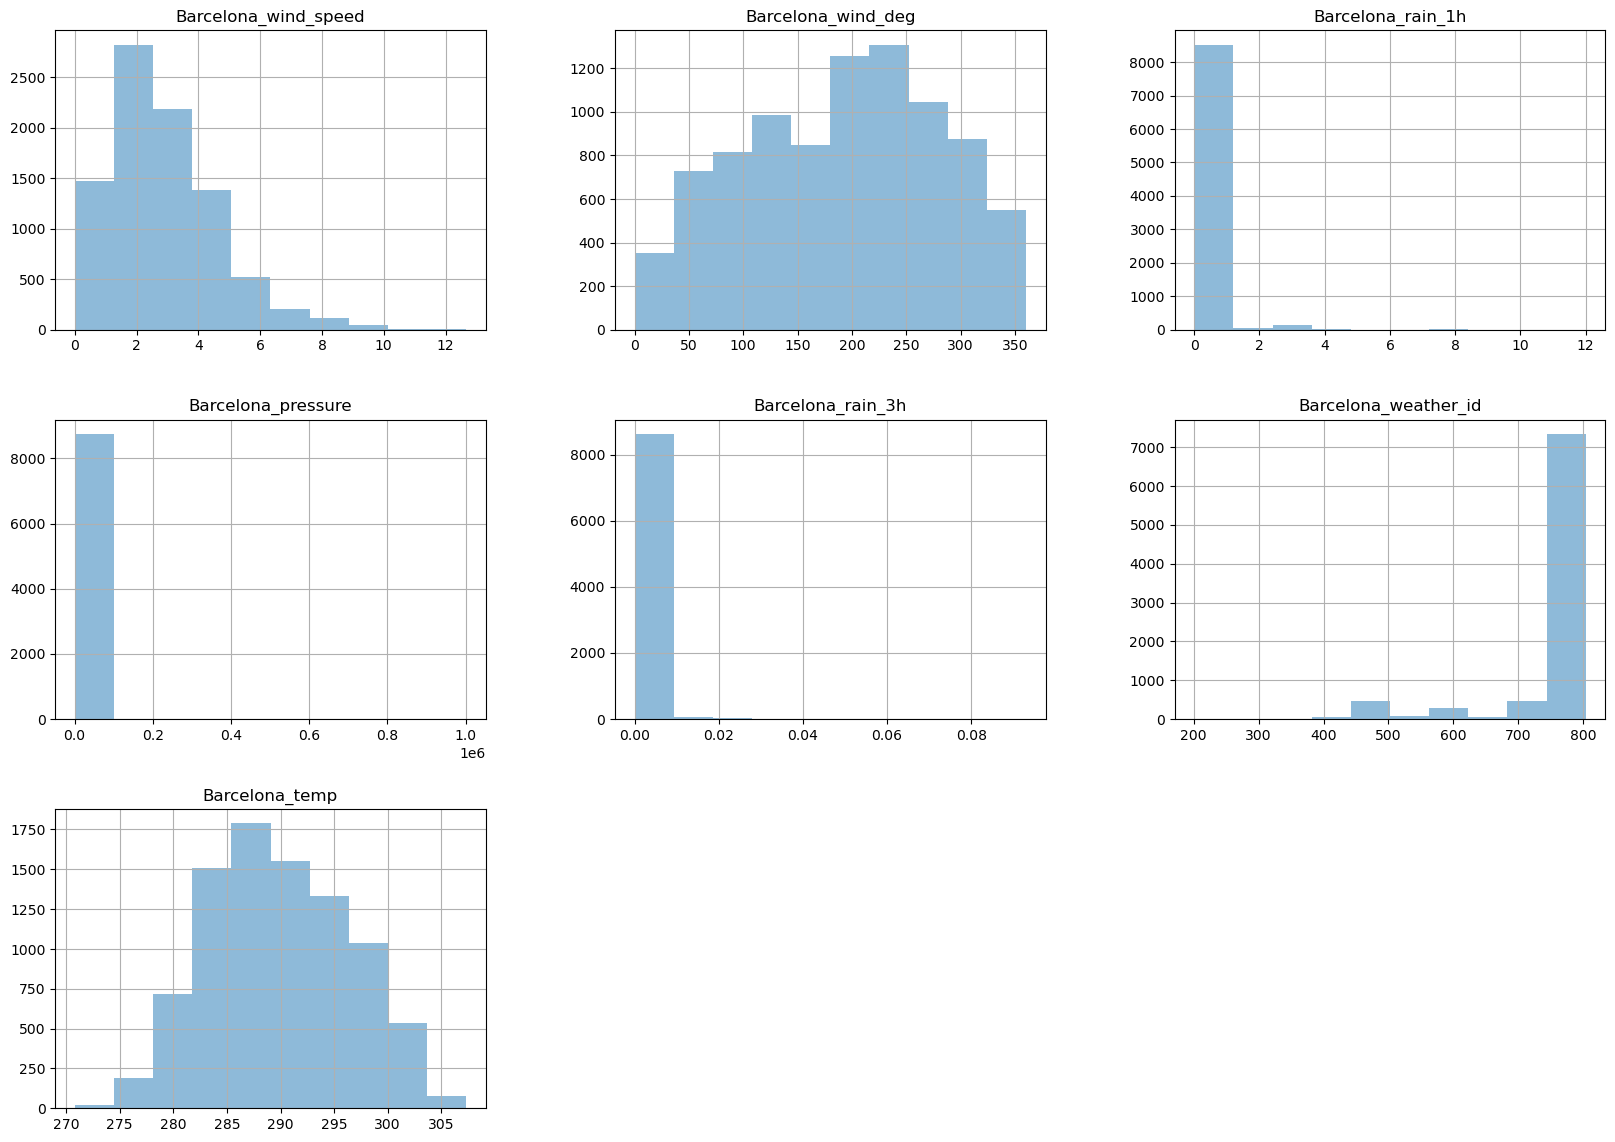

In [21]:
weather_distribution(df_train, 'Barcelona')

array([[<Axes: title={'center': 'Madrid_wind_speed'}>,
        <Axes: title={'center': 'Madrid_humidity'}>,
        <Axes: title={'center': 'Madrid_clouds_all'}>],
       [<Axes: title={'center': 'Madrid_rain_1h'}>,
        <Axes: title={'center': 'Madrid_weather_id'}>,
        <Axes: title={'center': 'Madrid_pressure'}>],
       [<Axes: title={'center': 'Madrid_temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

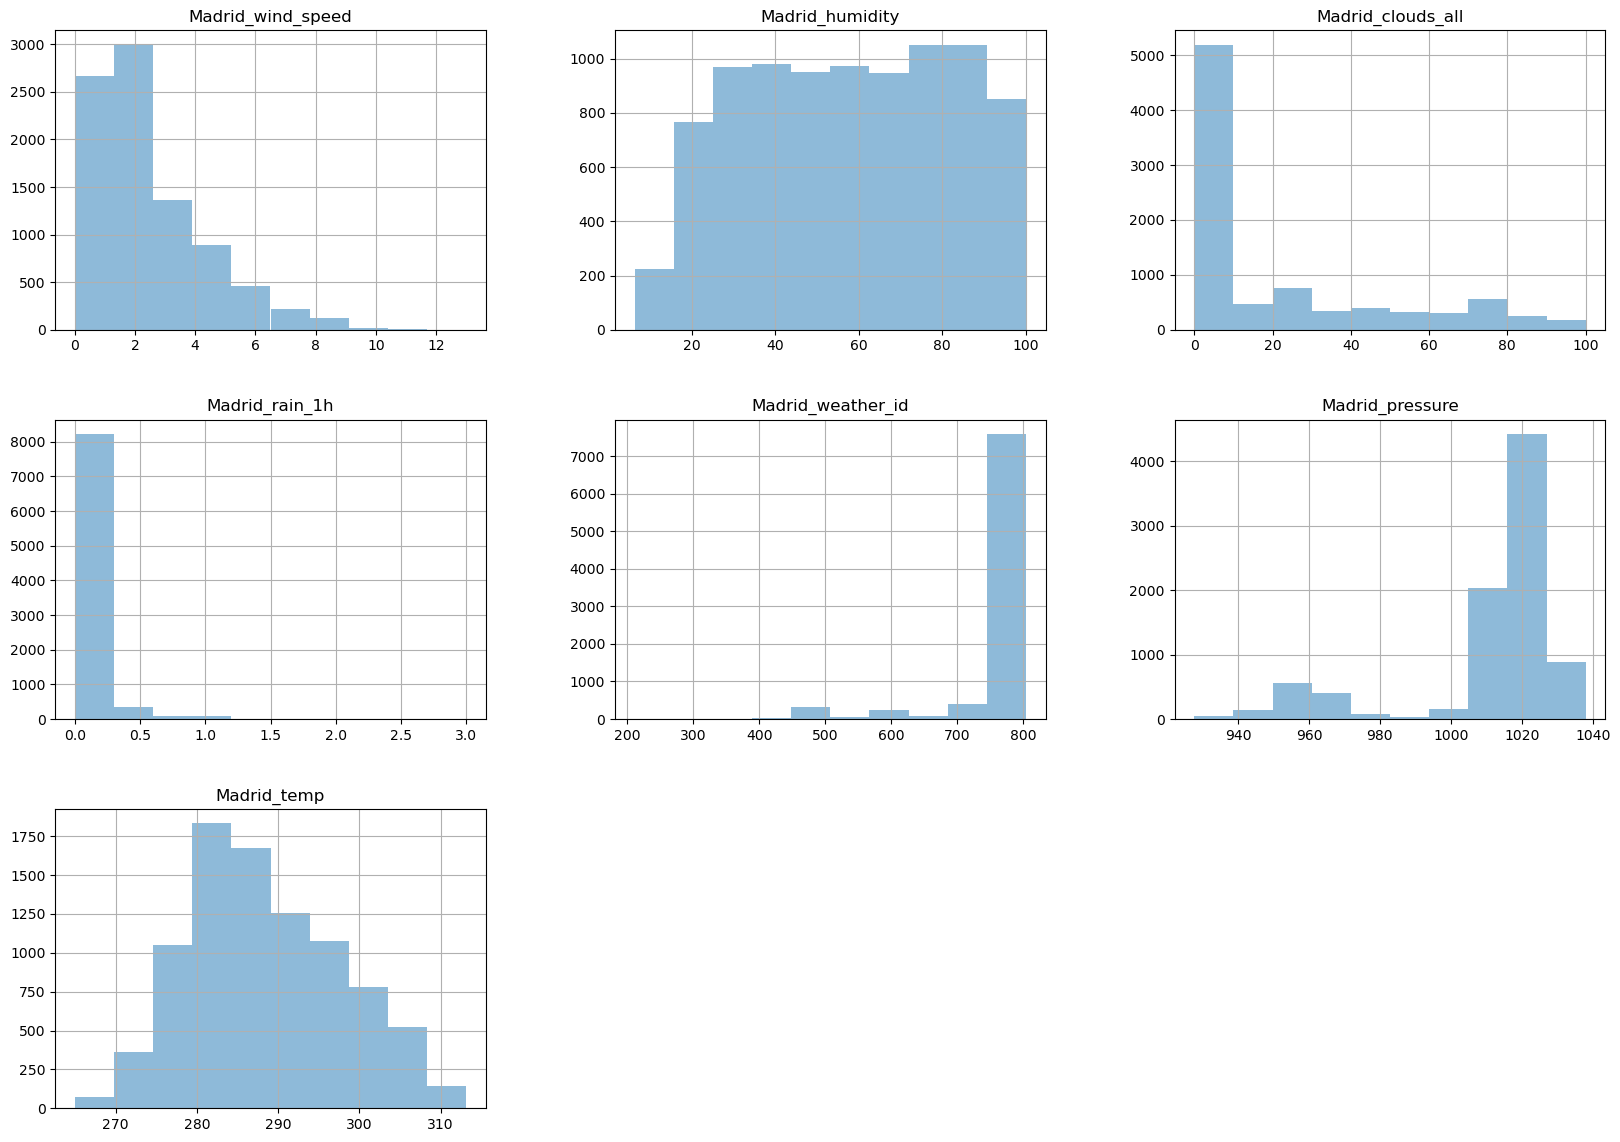

In [22]:
weather_distribution(df_train, 'Madrid')

array([[<Axes: title={'center': 'Seville_humidity'}>,
        <Axes: title={'center': 'Seville_clouds_all'}>,
        <Axes: title={'center': 'Seville_wind_speed'}>],
       [<Axes: title={'center': 'Seville_rain_1h'}>,
        <Axes: title={'center': 'Seville_rain_3h'}>,
        <Axes: title={'center': 'Seville_weather_id'}>],
       [<Axes: title={'center': 'Seville_temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

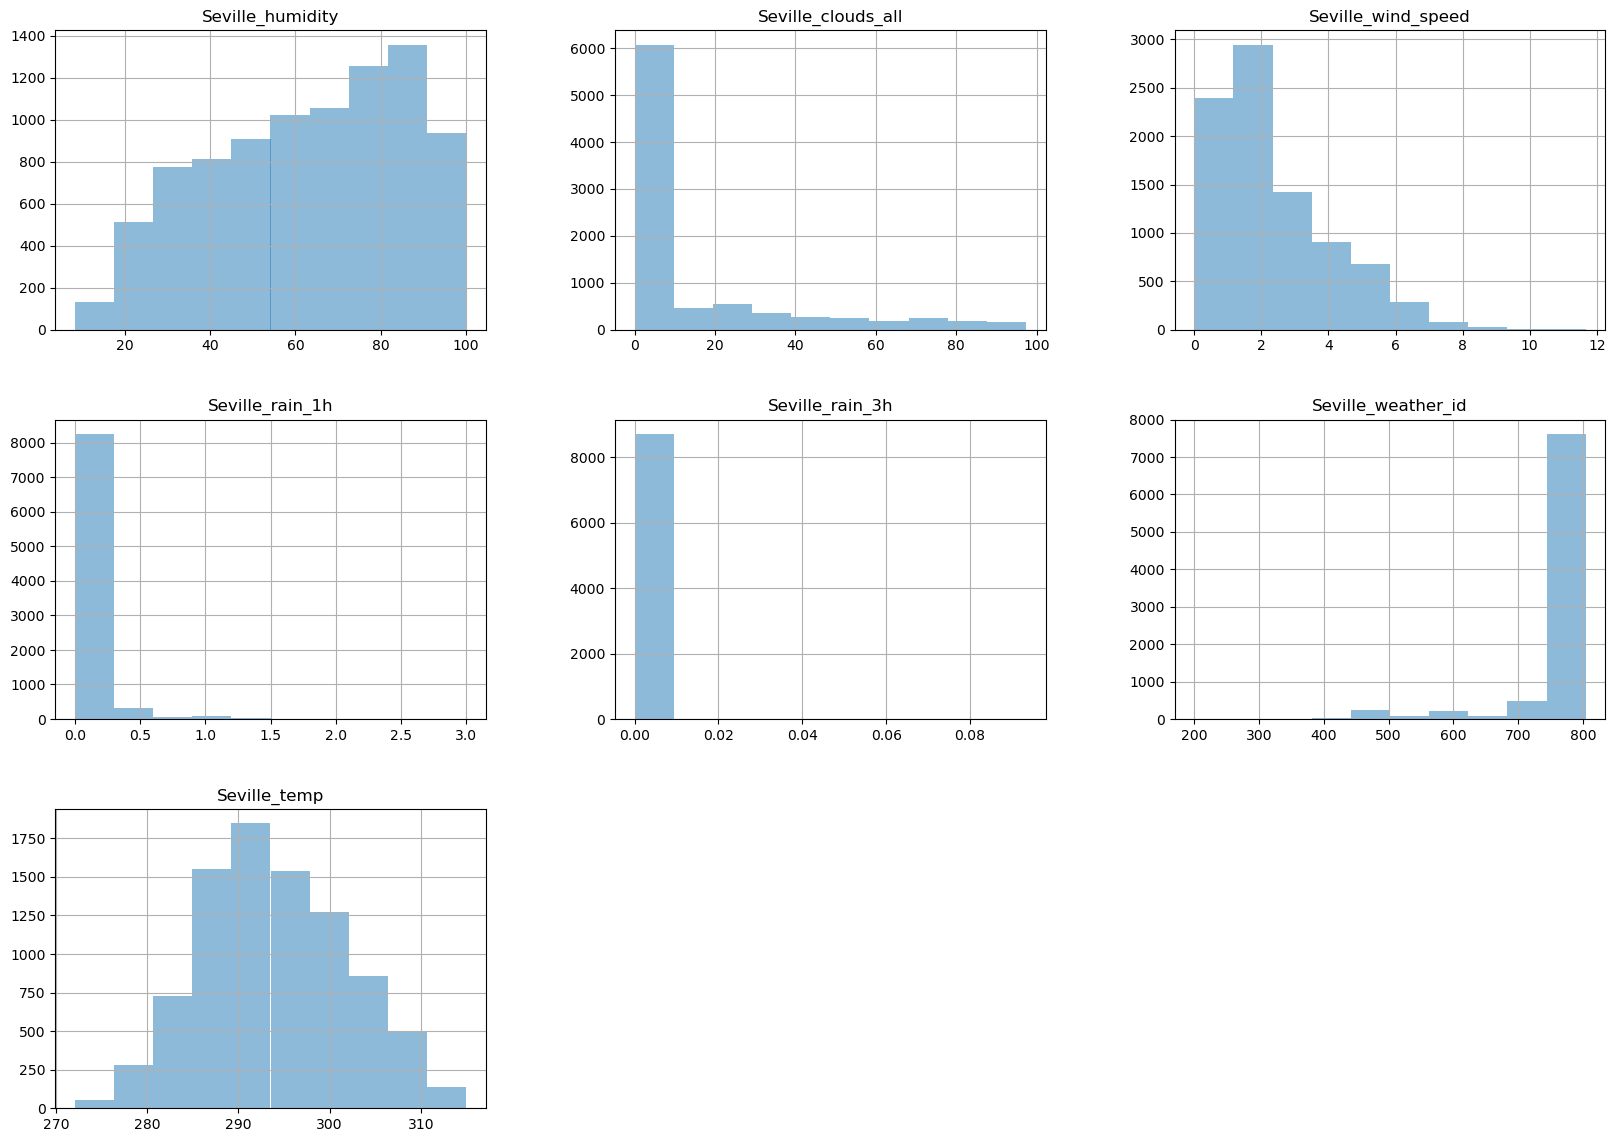

In [23]:
weather_distribution(df_train, 'Seville')

array([[<Axes: title={'center': 'Bilbao_rain_1h'}>,
        <Axes: title={'center': 'Bilbao_clouds_all'}>,
        <Axes: title={'center': 'Bilbao_wind_speed'}>],
       [<Axes: title={'center': 'Bilbao_wind_deg'}>,
        <Axes: title={'center': 'Bilbao_snow_3h'}>,
        <Axes: title={'center': 'Bilbao_pressure'}>],
       [<Axes: title={'center': 'Bilbao_weather_id'}>,
        <Axes: title={'center': 'Bilbao_temp'}>, <Axes: >]], dtype=object)

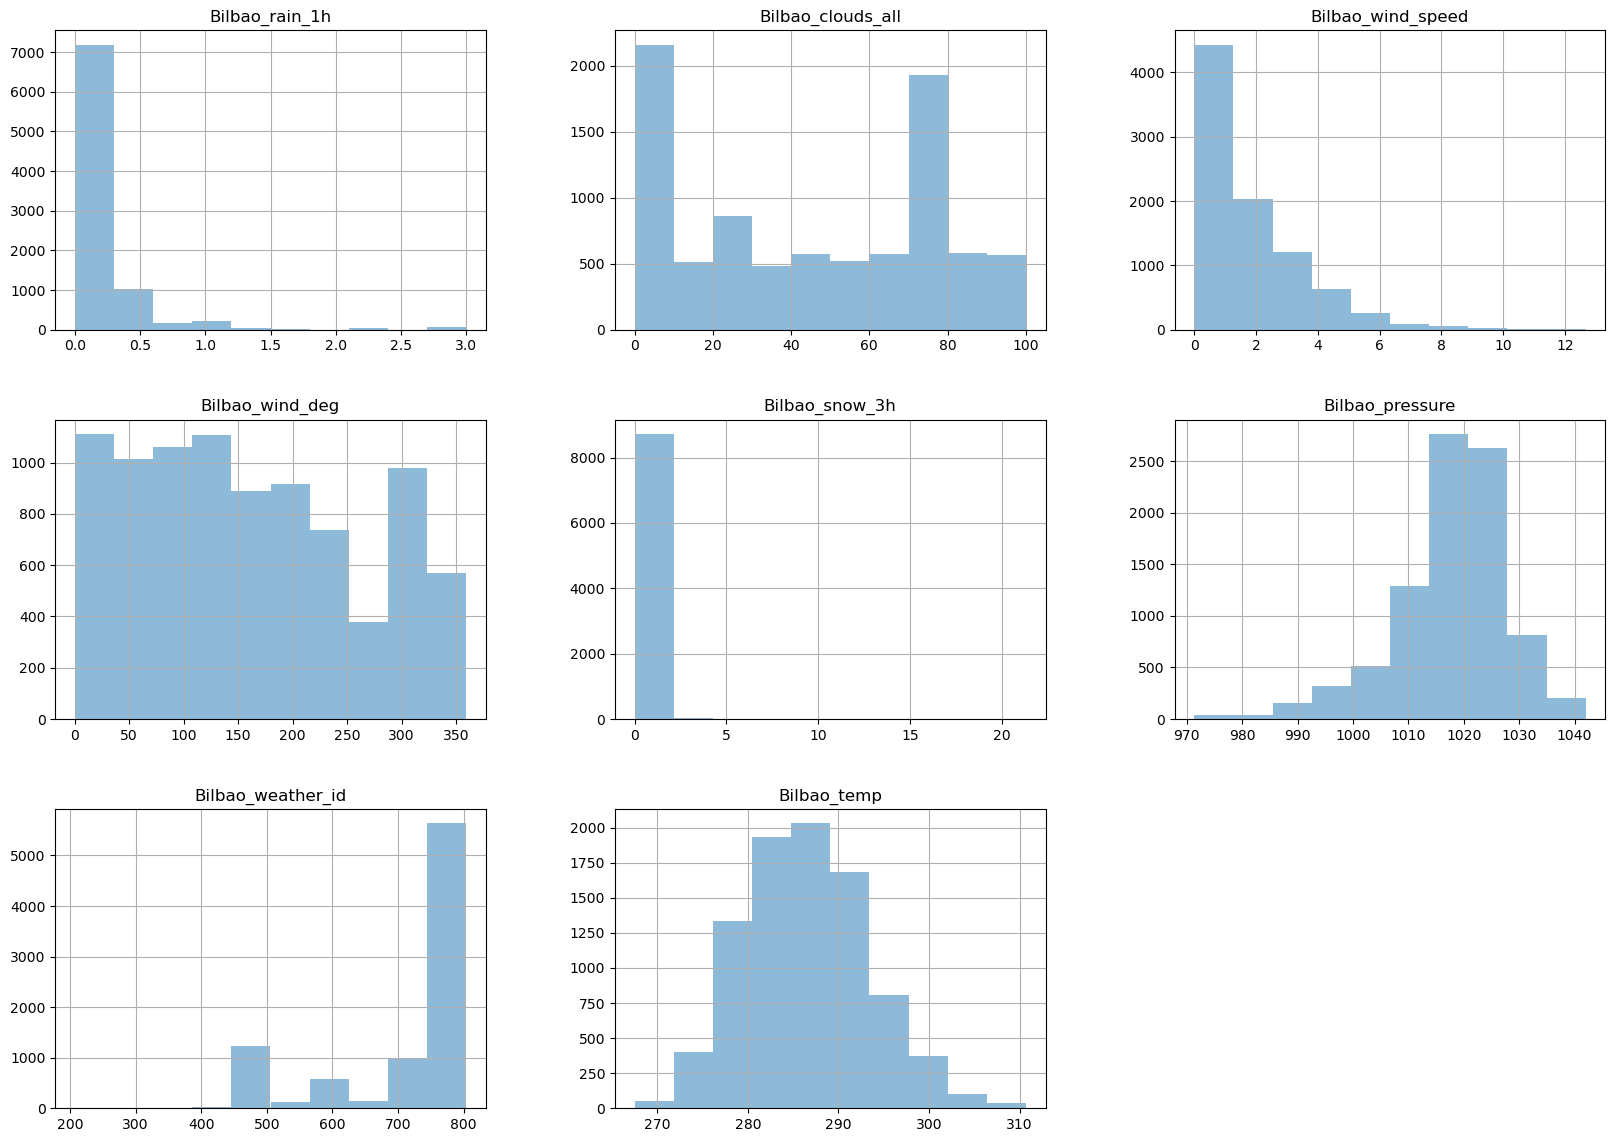

In [24]:
weather_distribution(df_train, 'Bilbao')

array([[<Axes: title={'center': 'Valencia_wind_speed'}>,
        <Axes: title={'center': 'Valencia_snow_3h'}>],
       [<Axes: title={'center': 'Valencia_pressure'}>,
        <Axes: title={'center': 'Valencia_temp'}>],
       [<Axes: title={'center': 'Valencia_humidity'}>, <Axes: >]],
      dtype=object)

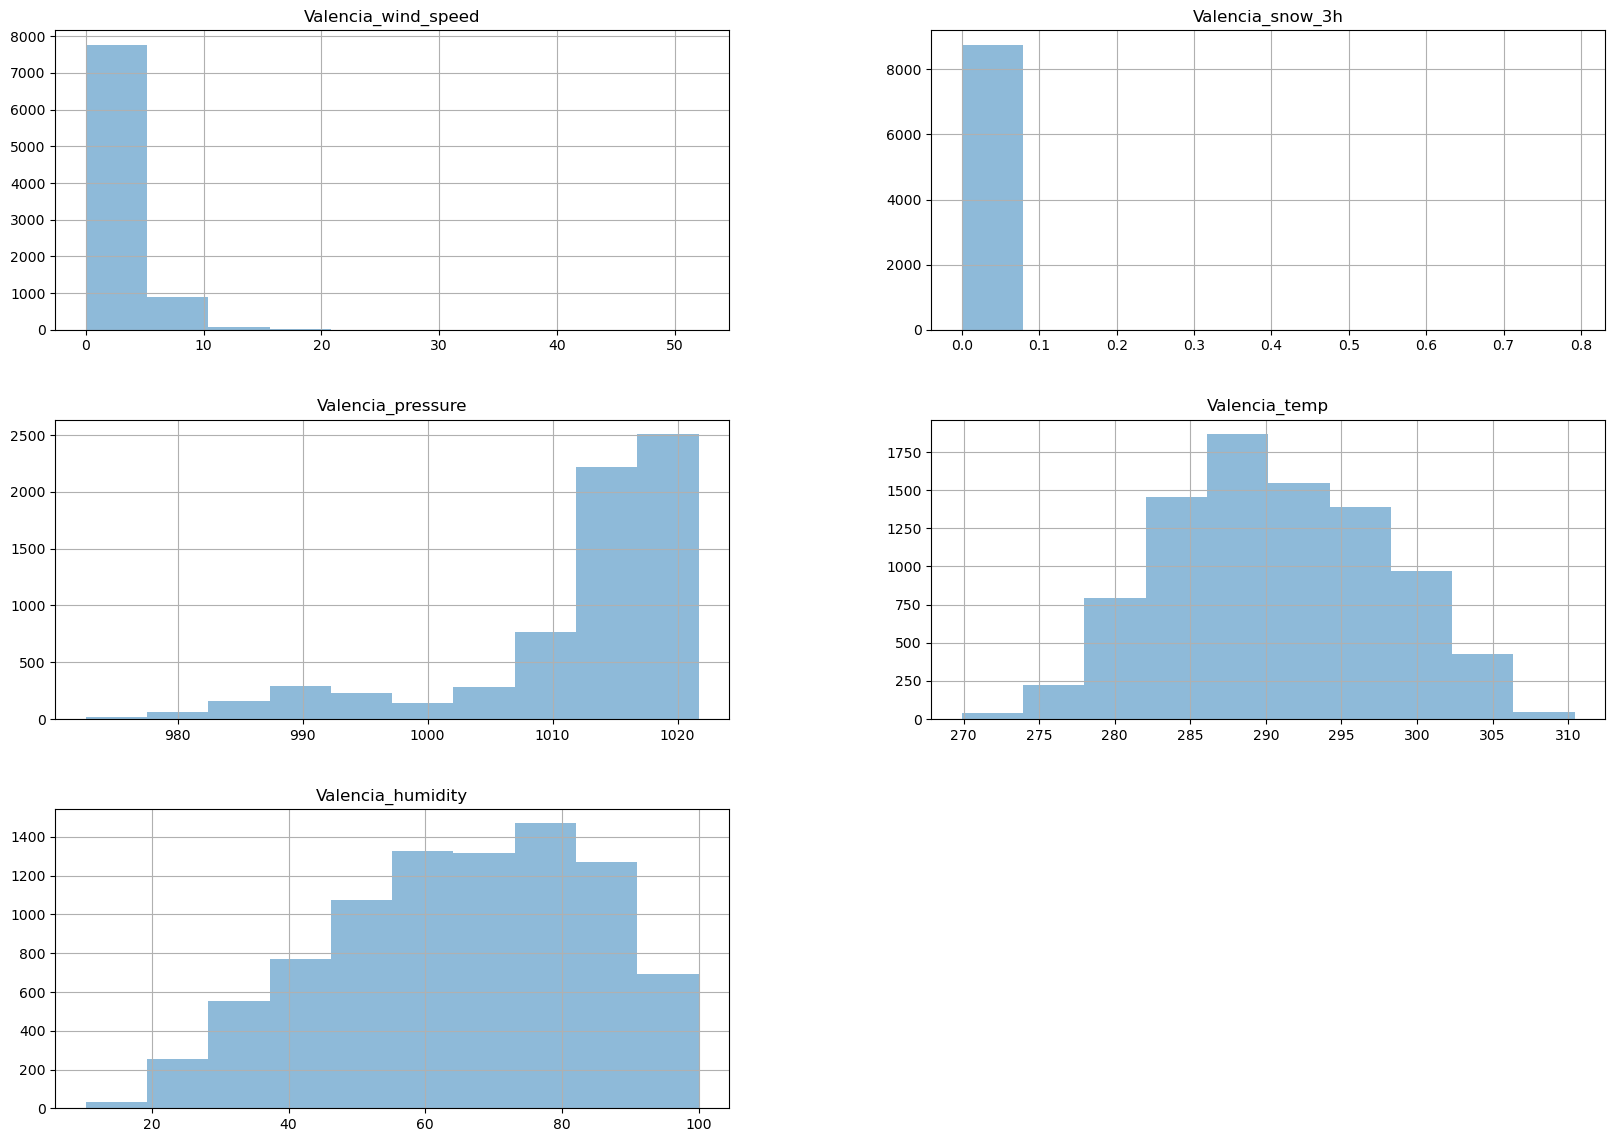

In [25]:
weather_distribution(df_train, 'Valencia')

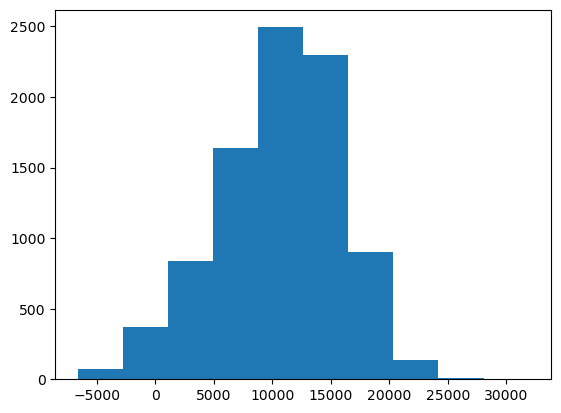

In [26]:
plt.hist(df_train['load_shortfall_3h']);

The target variable was found to have a normal distribution.


<a id="four"></a>
## 4. Data Engineering


Here we will:

- Removing correlated column(s)
- Replacing the missing values with `mean()`
- Convert the features with **object** datatype to **numeric** datatype
- Breaking down the `time` feature in to different features such as `Year`, `Month`, `Day`, `Hour` etc
- Removing columns with high-cardinality (Busy)
- Scaling the data.

In [86]:
# Distingush the orginal train data set from the cleaned date set
df_clean = df_train

In [87]:
# Fill in missing values/ features
df_clean['Valencia_pressure']= df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mean())

In [88]:
df_clean.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

The `Valencia_pressure` do not have any missing observation anymore

In [89]:
df_clean.dtypes

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg                int64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                 int64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

In [90]:
df_clean['time']

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [91]:
# First convert the time column to datetime dtype

df_clean['time']= pd.to_datetime(df_clean['time'])

In [92]:
df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [93]:
# Fixing the date-time feature by creating new features from it

# year
df_clean['Year'] = df_clean['time'].dt.year
# month
df_clean['Month'] = df_clean['time'].dt.month
# day
df_clean['Day'] = df_clean['time'].dt.day
# hour
df_clean['hour'] = df_clean['time'].dt.hour

df_clean.head()


Unnamed: 0                time  Madrid_wind_speed  Valencia_wind_deg  \
0           0 2015-01-01 03:00:00           0.666667                  5   
1           1 2015-01-01 06:00:00           0.333333                 10   
2           2 2015-01-01 09:00:00           1.000000                  9   
3           3 2015-01-01 12:00:00           1.000000                  8   
4           4 2015-01-01 15:00:00           1.000000                  7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_min  \
0                0.0           1.000000  ...          281.013000   
1                0.0           1.000000  ...          280.561667   
2                0.0           1.000000  ...          281.583667   
3                0.0           1.000000  ...          283.434104   
4                2.0           0.333333  ...          284.213167   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  \
0       269.338615        274.254667   265.938000       265.938000   
1       270.376000        274.945000   266.386667       266.386667   
2       275.027229        278.792000   272.708667       272.708667   
3       281.135063        285.394000   281.895219       281.895219   
4       282.252063        285.513719   280.678437       280.678437   

   load_shortfall_3h  Year  Month  Day  hour  
0        6715.666667  2015      1    1     3  
1        4171.666667  2015      1    1     6  
2        4274.666667  2015      1    1     9  
3        5075.666667  2015      1    1    12  
4        6620.666667  2015      1    1    15  

[5 rows x 53 columns]

In [94]:
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [58]:
df_clean['Valencia_wind_deg'].nunique()

10

In [ ]:
df_clean['Valencia_wind_deg']= df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [95]:
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [39]:
df_clean['Valencia_wind_deg']= pd.to_numeric(df_clean['Valencia_wind_deg'])

In [96]:
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [41]:
df_clean['Seville_pressure']= df_clean['Seville_pressure'].str.extract('(\d+)')

In [97]:
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [43]:
df_clean['Seville_pressure']= pd.to_numeric(df_clean['Seville_pressure'])

In [98]:
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [99]:
# Drop High and Low Cardinality
df_clean= df_clean.drop(["Unnamed: 0","time"], axis= 1)

In [122]:
# Drop high multi-collearity features (all wind deg)
df_clean= df_clean.drop(["Valencia_wind_deg", "Bilbao_wind_deg", "Barcelona_wind_deg"], axis= 1)
df_clean= df_clean.drop(["Barcelona_temp_max", "Barcelona_temp_min", "Bilbao_temp_max", "Bilbao_temp_min", "Madrid_temp_max","Madrid_temp_min","Seville_temp_min","Valencia_temp_min"], axis= 1)

In [101]:
# Drop outliers
df_clean= df_clean.drop(["Seville_rain_3h", "Bilbao_pressure"], axis= 1)


In [ ]:
sorted(df_clean.columns)

In [123]:
df_clean.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           0.666667             0.0             0.666667         74.333333   
1           0.333333             0.0             1.666667         78.333333   
2           1.000000             0.0             1.000000         71.333333   
3           1.000000             0.0             1.000000         65.333333   
4           1.000000             0.0             1.000000         59.000000   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0        64.000000                0.0           1.000000                 0.0   
1        64.666667                0.0           1.000000                 0.0   
2        64.333333                0.0           1.000000                 0.0   
3        56.333333                0.0           1.000000                 0.0   
4        57.000000                2.0           0.333333                 0.0   

   Barcelona_wind_speed  Madrid_clouds_all  ...  Seville_temp  \
0              6.333333                0.0  ...    274.254667   
1              4.000000                0.0  ...    274.945000   
2              2.000000                0.0  ...    278.792000   
3              2.333333                0.0  ...    285.394000   
4              4.333333                0.0  ...    285.513719   

   Valencia_humidity  Barcelona_temp  Bilbao_temp  Madrid_temp  \
0          75.666667      281.013000   269.338615   265.938000   
1          71.000000      280.561667   270.376000   266.386667   
2          65.666667      281.583667   275.027229   272.708667   
3          54.000000      283.434104   281.135063   281.895219   
4          58.333333      284.213167   282.252063   280.678437   

   load_shortfall_3h  Year  Month  Day  hour  
0        6715.666667  2015      1    1     3  
1        4171.666667  2015      1    1     6  
2        4274.666667  2015      1    1     9  
3        5075.666667  2015      1    1    12  
4        6620.666667  2015      1    1    15  

[5 rows x 38 columns]

### Preprocessing (Scaling the dataset )


In [124]:
# Initializing StandardScaler
scaler = StandardScaler()

In [125]:
# Save standardized features into new variable
features = df_clean.drop(columns = 'load_shortfall_3h') # here, we dont have to scale our dependent variable
X_scaled = scaler.fit_transform(features)
X_scaled = pd.DataFrame(X_scaled,columns=features.columns)
X_scaled.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0          -0.950708       -0.362123            -0.796169          0.516117   
1          -1.130863       -0.362123            -0.381412          0.692953   
2          -0.770554       -0.362123            -0.657917          0.383491   
3          -0.770554       -0.362123            -0.657917          0.118238   
4          -0.770554       -0.362123            -0.657917         -0.161751   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0         0.270621          -1.335491          -0.501451           -0.565065   
1         0.298017          -1.335491          -0.501451           -0.565065   
2         0.284319          -1.335491          -0.501451           -0.565065   
3        -0.044439          -1.335491          -0.501451           -0.565065   
4        -0.017043          -1.274045          -0.894581           -0.565065   

   Barcelona_wind_speed  Madrid_clouds_all  ...  Bilbao_weather_id  \
0              1.932284          -0.694188  ...           0.649842   
1              0.630270          -0.694188  ...           0.649842   
2             -0.485743          -0.694188  ...           0.649842   
3             -0.299741          -0.694188  ...           0.649842   
4              0.816272          -0.694188  ...           0.649842   

   Seville_temp  Valencia_humidity  Barcelona_temp  Bilbao_temp  Madrid_temp  \
0     -2.490266           0.540928       -1.354598    -2.505658    -2.405393   
1     -2.403108           0.298645       -1.423738    -2.353511    -2.357388   
2     -1.917409           0.021750       -1.267176    -1.671342    -1.680968   
3     -1.083879          -0.583957       -0.983703    -0.775541    -0.698057   
4     -1.068764          -0.358980       -0.864356    -0.611717    -0.828246   

       Year     Month       Day      hour  
0 -1.226179 -1.602429 -1.675368 -1.090901  
1 -1.226179 -1.602429 -1.675368 -0.654451  
2 -1.226179 -1.602429 -1.675368 -0.218001  
3 -1.226179 -1.602429 -1.675368  0.218449  
4 -1.226179 -1.602429 -1.675368  0.654899  

[5 rows x 37 columns]

In [126]:
# First define the predictor and target variables
X = X_scaled
y = df_clean['load_shortfall_3h']

In [127]:
# using just the training dataset to test model accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=PARAMETER_CONSTANT)

In [128]:
#checking the shape of our train and test data for better understanding

print('Training features:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing features:', X_test.shape)
print('Testing target:', y_test.shape)

Training features: (7010, 37)
Training target: (7010,)
Testing features: (1753, 37)
Testing target: (1753,)


In [129]:
y_train.head()

5967    12559.666667
8270    15848.000000
100     16585.666667
3410    12462.666667
1790     8987.666667
Name: load_shortfall_3h, dtype: float64

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Building and training a Multiple Linear Regression Model with our train data

In [74]:
Image(url='https://editor.analyticsvidhya.com/uploads/375512.jpg')

In [130]:
#Initialise the model
lr = LinearRegression()

#Fit the model into training set
lr.fit(X_train,y_train)

# predict testing target given training features X_test
lr_preds = lr.predict(X_test)

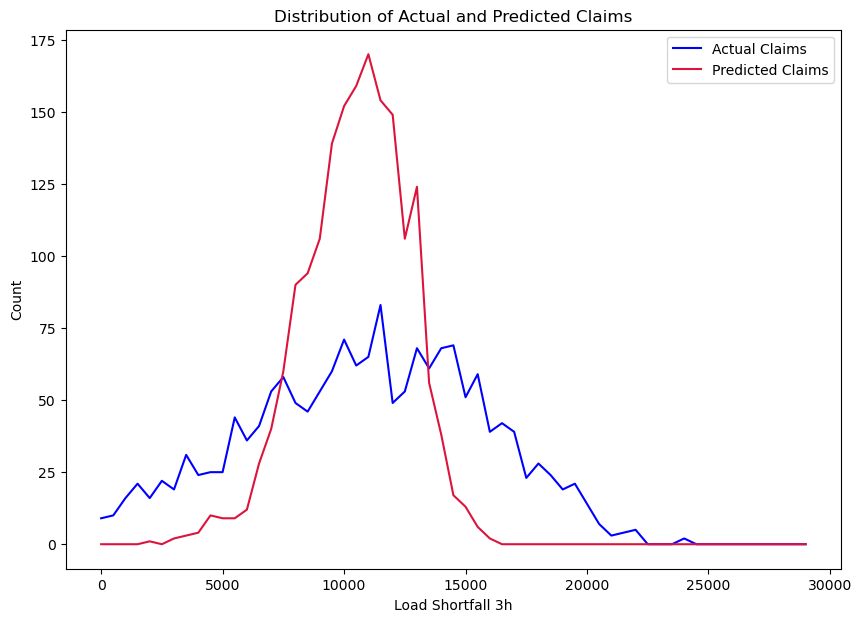

In [131]:

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 7))

# Create bins for the histogram
bins = range(0, 30000, 500)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test<80000], bins=bins)[0], color='blue', label='Actual Claims')
ax.plot(bins[:-1], np.histogram(lr_preds[lr_preds<80000], bins=bins)[0], color='crimson', label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims')
ax.set_xlabel('Load Shortfall 3h')
ax.set_ylabel('Count')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


In [132]:
# Evaluate the performance of the model
lr_mse = mean_squared_error(y_test,lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print('Mean Squared Error:', lr_mse)
print('Mean Absolute Error:', lr_mae)
print('r2_Score:', lr_r2)

Mean Squared Error: 23532314.187808134
Mean Absolute Error: 3871.82831573144
r2_Score: 0.16442109049677744


### Building and training a Random forest Regression Model with our train data 


In [112]:
Image(url='https://miro.medium.com/v2/resize:fit:720/format:webp/1*ZFuMI_HrI3jt2Wlay73IUQ.png')

In [133]:
# Instantiate a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
rf_pred = rf.predict(X_test)


In [134]:
# Evaluate the performance of the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Mean Squared Error:', rf_mse)
print('Mean Absolute Error:', rf_mae)
print('r2_Score:', rf_r2)

Mean Squared Error: 10215371.249891037
Mean Absolute Error: 2513.6173131774112
r2_Score: 0.6372754204694067


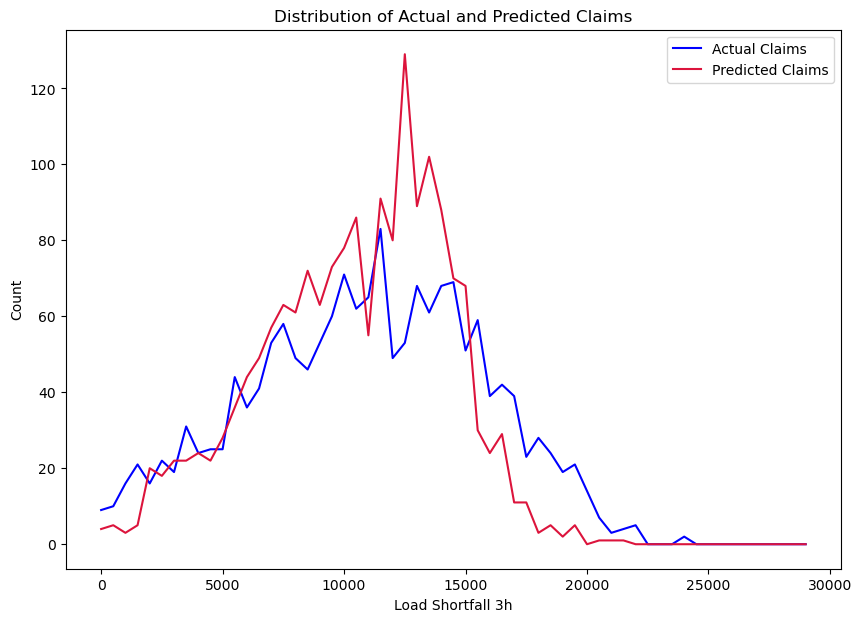

In [135]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 7))

# Create bins for the histogram
bins = range(0, 30000, 500)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test<80000], bins=bins)[0], color='blue', label='Actual Claims')
ax.plot(bins[:-1], np.histogram(rf_pred[rf_pred<80000], bins=bins)[0], color='crimson', label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims')
ax.set_xlabel('Load Shortfall 3h')
ax.set_ylabel('Count')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


### Building and training a Decision Tree Regression Model with our train data 


In [136]:
# Initialise regression tree model
Reg_tree = DecisionTreeRegressor(random_state=42)

# Fitting the model
Reg_tree.fit(X_train,y_train)

# Predictions
Tree_pred = Reg_tree.predict(X_test)

In [137]:
# Evaluate the performance of the model
Tree_mse = mean_squared_error(y_test, Tree_pred)
Tree_mae = mean_absolute_error(y_test, Tree_pred)
Tree_r2 = r2_score(y_test, Tree_pred)

print('Mean Squared Error:', Tree_mse)
print('Mean Absolute Error:', Tree_mae)
print('r2_Score:', Tree_r2)

Mean Squared Error: 19933560.951507732
Mean Absolute Error: 3321.1696615326114
r2_Score: 0.2922046259689072


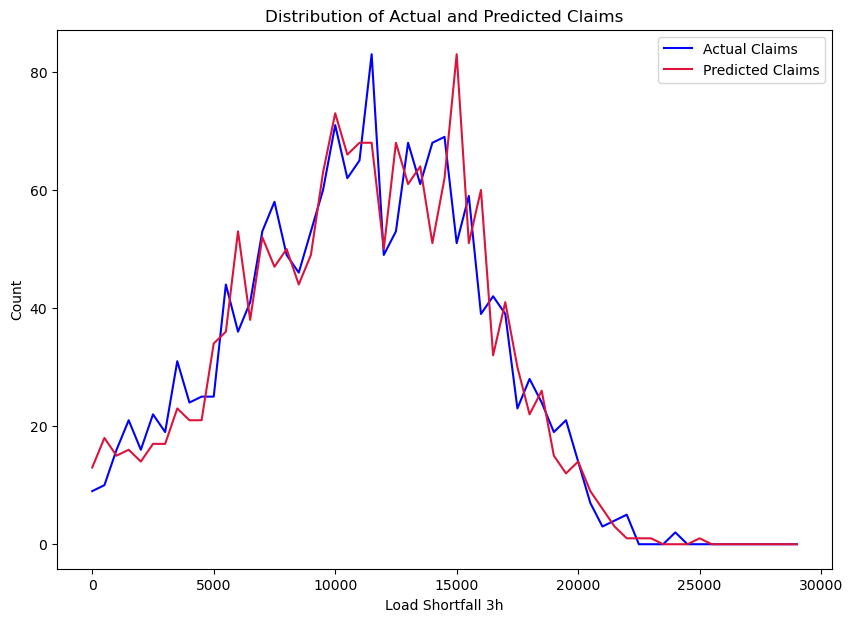

In [138]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 7))

# Create bins for the histogram
bins = range(0, 30000, 500)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test<80000], bins=bins)[0], color='blue', label='Actual Claims')
ax.plot(bins[:-1], np.histogram(Tree_pred[Tree_pred<80000], bins=bins)[0], color='crimson', label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims')
ax.set_xlabel('Load Shortfall 3h')
ax.set_ylabel('Count')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


### Building and training a XGBoost Regressor Model with our train data 

In [139]:
# Initialise XGBoost Regressor Model 
xgb = XGBRegressor()

# Fitting the model
xgb.fit(X_train,y_train)

# Predictions
Xgb_pred = xgb.predict(X_test)

In [140]:
# Evaluate the performance of the model
Xgb_mse = mean_squared_error(y_test, Xgb_pred)
Xgb_mae = mean_absolute_error(y_test, Xgb_pred)
Xgb_r2 = r2_score(y_test, Xgb_pred)

print('Mean Squared Error:', Xgb_mse)
print('Mean Absolute Error:', Xgb_mae)
print('r2_Score:', Xgb_r2)

Mean Squared Error: 9531676.342756247
Mean Absolute Error: 2427.347355596873
r2_Score: 0.6615518703067358


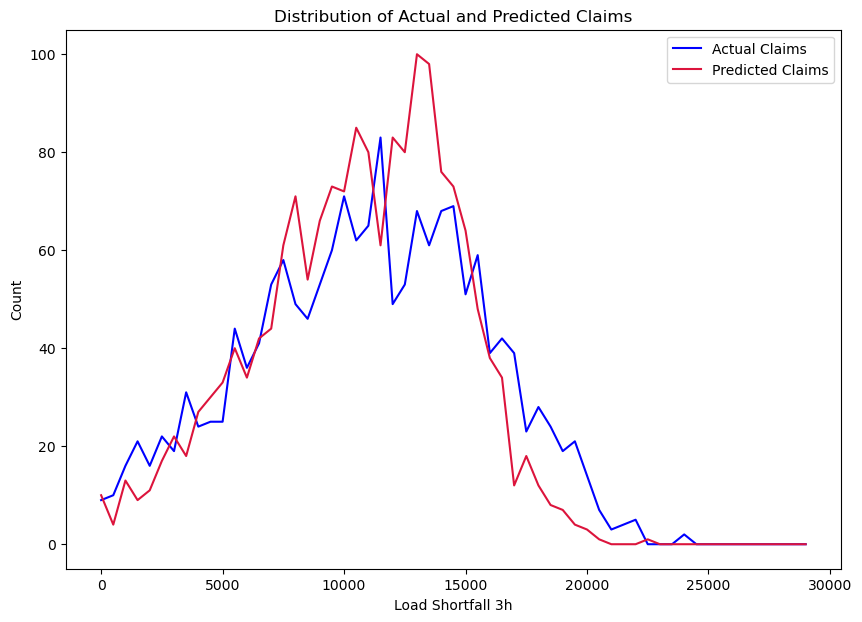

In [141]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 7))

# Create bins for the histogram
bins = range(0, 30000, 500)

# Plot the actual and predicted values as line graphs
ax.plot(bins[:-1], np.histogram(y_test[y_test<80000], bins=bins)[0], color='blue', label='Actual Claims')
ax.plot(bins[:-1], np.histogram(Xgb_pred[Xgb_pred<80000], bins=bins)[0], color='crimson', label='Predicted Claims')

# Set the plot title and axis labels
ax.set_title('Distribution of Actual and Predicted Claims')
ax.set_xlabel('Load Shortfall 3h')
ax.set_ylabel('Count')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

<a id="six"></a>
## 6. Model Performance


### Comparing the Root Mean Square Error across Models

In [142]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,lr_preds)),
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_test,rf_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                         "Xgboost" : np.sqrt(metrics.mean_squared_error(y_test,Xgb_pred))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Decision Tree  4464.701664
Linear model   4851.011666
Random Forest  3196.149441
Xgboost        3087.341306

In [143]:
# Define a list of custom colors
colors = ['#1c2444', '#f57014', '#2c88d0', '#fcbf96']

# Create a bar chart of test RMSE values
fig = px.bar(Model_Performance, y=Model_Performance['Test RMSE'], color=Model_Performance.index,
             color_discrete_sequence=colors, width=700, height=400)

# Set the chart title and axis labels
fig.update_layout(title='Model Performance based on RMSE', xaxis_title='Model', yaxis_title='Test RMSE')

# Display the chart
fig.show()


### Comparing the Mean Square Error across Models

In [144]:
Model_Performance_2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,lr_preds)),
                        "Random Forest": (metrics.mean_squared_error(y_test,rf_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                         "Xgboost" : (metrics.mean_squared_error(y_test,Xgb_pred))}
                        
                    }

# create dataframe from dictionary
Model_Performance_2 = pd.DataFrame(data=Model_Performance_2)
Model_Performance_2

Test MSE
Decision Tree  1.993356e+07
Linear model   2.353231e+07
Random Forest  1.021537e+07
Xgboost        9.531676e+06

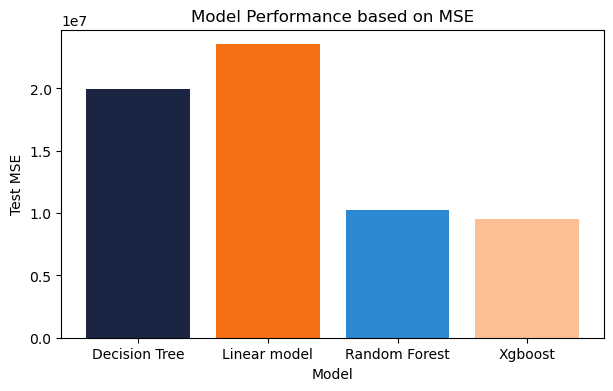

In [145]:
# Define a list of custom colors
colors = ['#1c2444', '#f57014', '#2c88d0', '#fcbf96']

# Create a bar chart of test MAE values
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(Model_Performance_2.index, Model_Performance_2['Test MSE'], color=colors)

# Set the chart title and axis labels
ax.set_title('Model Performance based on MSE')
ax.set_xlabel('Model')
ax.set_ylabel('Test MSE')

# Display the chart
plt.show()

### Comparing the Mean Absolute Error across Models

In [146]:
Model_Performance_3 = { 
    
                      'Test MAE':
                    
                        {"Linear model": (mean_absolute_error(y_test,lr_preds)),
                        "Random Forest": (mean_absolute_error(y_test,rf_pred)),
                        "Decision Tree" : (mean_absolute_error(y_test,Tree_pred)),
                         "Xgboost" : (mean_absolute_error(y_test,Xgb_pred))}
                        
                    }

# create dataframe from dictionary
Model_Performance_3 = pd.DataFrame(data=Model_Performance_3)
Model_Performance_3

Test MAE
Decision Tree  3321.169662
Linear model   3871.828316
Random Forest  2513.617313
Xgboost        2427.347356

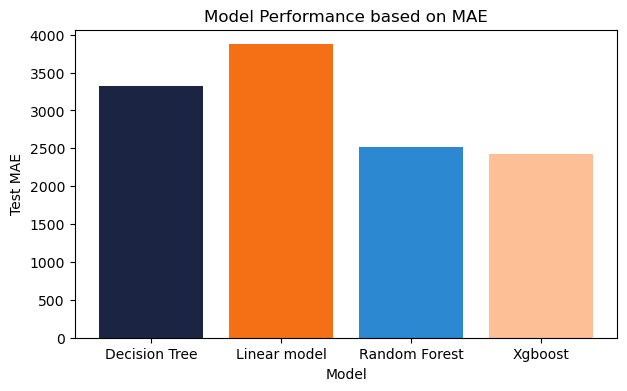

In [147]:

# Define a list of custom colors
colors = ['#1c2444', '#f57014', '#2c88d0', '#fcbf96']

# Create a bar chart of test MAE values
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(Model_Performance_3.index, Model_Performance_3['Test MAE'], color=colors)

# Set the chart title and axis labels
ax.set_title('Model Performance based on MAE')
ax.set_xlabel('Model')
ax.set_ylabel('Test MAE')

# Display the chart
plt.show()

### Comparing the R-Squared across Models


In [148]:
Model_Performance_4 = { 
    
                      'R-Squared':
                    
                        {"Linear model": (r2_score(y_test,lr_preds)),
                        "Random Forest": (r2_score(y_test,rf_pred)),
                        "Decision Tree" : (r2_score(y_test,Tree_pred)),
                         "Xgboost" : (r2_score(y_test,Xgb_pred))}
                        
                    }

# create dataframe from dictionary
Model_Performance_4 = pd.DataFrame(data=Model_Performance_4)
Model_Performance_4

R-Squared
Decision Tree   0.292205
Linear model    0.164421
Random Forest   0.637275
Xgboost         0.661552

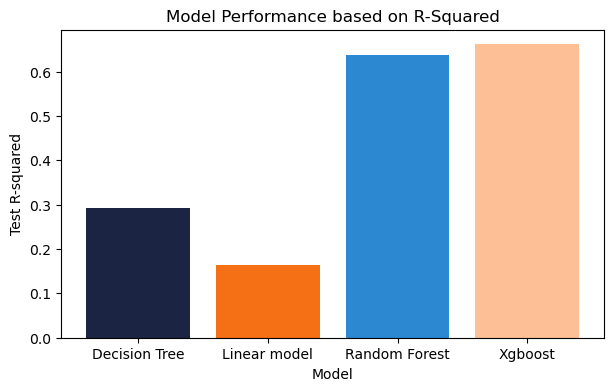

In [149]:

# Define a list of custom colors
colors = ['#1c2444', '#f57014', '#2c88d0', '#fcbf96']

# Create a bar chart of test R-squared values
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(Model_Performance_4.index, Model_Performance_4['R-Squared'], color=colors)

# Set the chart title and axis labels
ax.set_title('Model Performance based on R-Squared')
ax.set_xlabel('Model')
ax.set_ylabel('Test R-squared')

# Display the chart
plt.show()

In [150]:
df_clean.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           0.666667             0.0             0.666667         74.333333   
1           0.333333             0.0             1.666667         78.333333   
2           1.000000             0.0             1.000000         71.333333   
3           1.000000             0.0             1.000000         65.333333   
4           1.000000             0.0             1.000000         59.000000   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0        64.000000                0.0           1.000000                 0.0   
1        64.666667                0.0           1.000000                 0.0   
2        64.333333                0.0           1.000000                 0.0   
3        56.333333                0.0           1.000000                 0.0   
4        57.000000                2.0           0.333333                 0.0   

   Barcelona_wind_speed  Madrid_clouds_all  ...  Seville_temp  \
0              6.333333                0.0  ...    274.254667   
1              4.000000                0.0  ...    274.945000   
2              2.000000                0.0  ...    278.792000   
3              2.333333                0.0  ...    285.394000   
4              4.333333                0.0  ...    285.513719   

   Valencia_humidity  Barcelona_temp  Bilbao_temp  Madrid_temp  \
0          75.666667      281.013000   269.338615   265.938000   
1          71.000000      280.561667   270.376000   266.386667   
2          65.666667      281.583667   275.027229   272.708667   
3          54.000000      283.434104   281.135063   281.895219   
4          58.333333      284.213167   282.252063   280.678437   

   load_shortfall_3h  Year  Month  Day  hour  
0        6715.666667  2015      1    1     3  
1        4171.666667  2015      1    1     6  
2        4274.666667  2015      1    1     9  
3        5075.666667  2015      1    1    12  
4        6620.666667  2015      1    1    15  

[5 rows x 38 columns]

From the graph above, we can confirm that the Random Forest model performs better than others in terms of R_Squared

<a id="seven"></a>
## 7. Model Explanations


From all of these Results, we will choose Xgbooter for our model Predictions as it meets all the expectations for a regression model and gives better performing metric.

* Xgb Boost has a higher R2 for Test data as compared to the other models.
* Xgb Boost again has a lower RMSE for both the Training and Test data as compared to the other models.
* We can therefore conclude that Xgb Boost is the best model to use for prediction of 3 hourly load shortfall in Spain

In [151]:
df_train.head()

Unnamed: 0                time  Madrid_wind_speed  Valencia_wind_deg  \
0           0 2015-01-01 03:00:00           0.666667                  5   
1           1 2015-01-01 06:00:00           0.333333                 10   
2           2 2015-01-01 09:00:00           1.000000                  9   
3           3 2015-01-01 12:00:00           1.000000                  8   
4           4 2015-01-01 15:00:00           1.000000                  7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_min  \
0                0.0           1.000000  ...          281.013000   
1                0.0           1.000000  ...          280.561667   
2                0.0           1.000000  ...          281.583667   
3                0.0           1.000000  ...          283.434104   
4                2.0           0.333333  ...          284.213167   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  \
0       269.338615        274.254667   265.938000       265.938000   
1       270.376000        274.945000   266.386667       266.386667   
2       275.027229        278.792000   272.708667       272.708667   
3       281.135063        285.394000   281.895219       281.895219   
4       282.252063        285.513719   280.678437       280.678437   

   load_shortfall_3h  Year  Month  Day  hour  
0        6715.666667  2015      1    1     3  
1        4171.666667  2015      1    1     6  
2        4274.666667  2015      1    1     9  
3        5075.666667  2015      1    1    12  
4        6620.666667  2015      1    1    15  

[5 rows x 53 columns]

## Conclusion

As professional data scientists, we have successfully developed a model that will assist in predicting the 3 hourly load shortfall (which is the difference in energy generated by fossil fuels and renewable sources) as a function of various city-specific weather features.

The Xgb Boost Regressor emerged to be the best model with a R-Squared of 0.67 which tells us that 67% proportion of load shortfall can be directly attributed to the renewable sources variables. This will assist in informing the Spanish Government of any trends and patterns of the country's renewable resources and fossil fuel energy generation.

We therefore recommend that Spainish Government should consider expanding its renewable energy resource infrastructure investments.

## Predicting the Load_shortfall with the test set on Kaggle

In [152]:
def feature_engineer(filepath):
    
    # Read csv file into dataframe 
    df = pd.read_csv(filepath)
    
    #Filling missing values
    df['Valencia_pressure'] = df.get(['Valencia_pressure'])
    df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)
   
    #converting Valencia_wind_deg and Seville_pressure from object to numeric
    df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)').astype('float')
    df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)').astype('float')
    
    # Fixing the date-time feature by creating new features from it

    df['time']= pd.to_datetime(df['time'])
    # year
    df['Year'] = df['time'].dt.year
    # month
    df['Month'] = df['time'].dt.month
    # day
    df['Day'] = df['time'].dt.day
    # hour
    df['hour'] = df['time'].dt.hour
    
    df.drop(['Unnamed: 0', 'time'], axis = 1, inplace = True)
    # Drop high multi-collearity features (all wind deg)
    df= df.drop(["Valencia_wind_deg", "Bilbao_wind_deg", "Barcelona_wind_deg"], axis= 1)
    df= df.drop(["Barcelona_temp_max", "Barcelona_temp_min", "Bilbao_temp_max", "Bilbao_temp_min", "Madrid_temp_max","Madrid_temp_min","Seville_temp_min","Valencia_temp_min"], axis= 1)


    # Drop outliers
    df= df.drop(["Seville_rain_3h", "Bilbao_pressure"], axis= 1)

    
    # Initialize StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    X_scaled = pd.DataFrame(X_scaled,columns=df.columns)
    
    return X_scaled

In [153]:
feature_engineer('df_test.csv')


Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0              1.432590       -0.440268             0.995600   
1              1.244747       -0.440268             1.162600   
2             -0.070152       -0.440268             0.995600   
3              0.117691       -0.440268             1.162600   
4              0.869062       -0.440268             2.832609   
...                 ...             ...                  ...   
2915          -1.197208       -0.440268            -0.507408   
2916          -1.197208       -0.440268            -0.841410   
2917          -0.821522       -0.440268            -0.006406   
2918          -0.821522       -0.440268            -0.507408   
2919          -0.633680       -0.440268            -0.340407   

      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0             0.964514         0.360022          -0.766227           0.433023   
1             1.061565         0.636255          -1.422372           0.835964   
2             1.061565         1.119662          -1.422372           0.030083   
3             1.271842         0.829617          -0.547512           2.044786   
4            -0.086869         0.056166          -0.547512           5.066840   
...                ...              ...                ...                ...   
2915          0.705712        -0.537733           1.202207          -0.574328   
2916         -0.297146        -1.421677           0.436705          -0.775799   
2917         -0.976502        -1.504547          -1.422372          -0.977269   
2918         -0.701524        -0.247689          -1.422372          -0.977269   
2919         -0.264796         0.277152          -1.422372          -0.574328   

      Seville_clouds_all  Barcelona_wind_speed  Madrid_clouds_all  ...  \
0              -0.612116              0.911814          -0.824321  ...   
1              -0.612116              1.322013          -0.824321  ...   
2              -0.348454              0.911814          -0.824321  ...   
3              -0.348454             -0.113683          -0.824321  ...   
4              -0.612116              1.322013          -0.824321  ...   
...                  ...                   ...                ...  ...   
2915           -0.612116              2.347510          -0.824321  ...   
2916           -0.612116              0.091417          -0.824321  ...   
2917           -0.612116              0.091417          -0.824321  ...   
2918           -0.612116             -0.113683          -0.824321  ...   
2919           -0.612116              1.322013          -0.824321  ...   

      Bilbao_weather_id  Seville_temp  Valencia_humidity  Barcelona_temp  \
0              0.602769     -0.914192          -0.996620       -0.358886   
1             -0.151153     -1.172696          -0.597040       -0.803756   
2              0.593345     -1.309704          -1.232735       -0.949861   
3              0.605911     -1.397164          -1.069270       -0.944241   
4              0.605911     -0.669043          -1.287223       -0.434748   
...                 ...           ...                ...             ...   
2915          -0.025499     -1.361835           0.274770       -1.653691   
2916           0.100155     -0.448022          -1.777616       -0.528405   
2917           0.593345      0.009101          -2.231684       -0.153310   
2918           0.593345     -0.316184          -0.306437       -0.763952   
2919           0.593345     -0.817252           0.783326       -1.233172   

      Bilbao_temp  Madrid_temp  Year     Month       Day      hour  
0       -0.946256    -0.891613   0.0 -1.602745 -1.673503 -1.527525  
1       -0.849202    -0.966628   0.0 -1.602745 -1.673503 -1.091089  
2       -1.128553    -1.284514   0.0 -1.602745 -1.673503 -0.654654  
3       -0.736743    -1.327592   0.0 -1.602745 -1.673503 -0.218218  
4       -0.370608    -0.800258   0.0 -1.602745 -1.673503  0.218218  
...           ...          ...   ...       ...  

In [154]:
X_test_kaggle_data = feature_engineer("df_test.csv")

In [155]:
time = df_test['time']
time

0       2018-01-01 00:00:00
1       2018-01-01 03:00:00
2       2018-01-01 06:00:00
3       2018-01-01 09:00:00
4       2018-01-01 12:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 2920, dtype: object

In [156]:
X_test_kaggle_data = feature_engineer("df_test.csv")
X_test_kaggle_data

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
0              1.432590       -0.440268             0.995600   
1              1.244747       -0.440268             1.162600   
2             -0.070152       -0.440268             0.995600   
3              0.117691       -0.440268             1.162600   
4              0.869062       -0.440268             2.832609   
...                 ...             ...                  ...   
2915          -1.197208       -0.440268            -0.507408   
2916          -1.197208       -0.440268            -0.841410   
2917          -0.821522       -0.440268            -0.006406   
2918          -0.821522       -0.440268            -0.507408   
2919          -0.633680       -0.440268            -0.340407   

      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0             0.964514         0.360022          -0.766227           0.433023   
1             1.061565         0.636255          -1.422372           0.835964   
2             1.061565         1.119662          -1.422372           0.030083   
3             1.271842         0.829617          -0.547512           2.044786   
4            -0.086869         0.056166          -0.547512           5.066840   
...                ...              ...                ...                ...   
2915          0.705712        -0.537733           1.202207          -0.574328   
2916         -0.297146        -1.421677           0.436705          -0.775799   
2917         -0.976502        -1.504547          -1.422372          -0.977269   
2918         -0.701524        -0.247689          -1.422372          -0.977269   
2919         -0.264796         0.277152          -1.422372          -0.574328   

      Seville_clouds_all  Barcelona_wind_speed  Madrid_clouds_all  ...  \
0              -0.612116              0.911814          -0.824321  ...   
1              -0.612116              1.322013          -0.824321  ...   
2              -0.348454              0.911814          -0.824321  ...   
3              -0.348454             -0.113683          -0.824321  ...   
4              -0.612116              1.322013          -0.824321  ...   
...                  ...                   ...                ...  ...   
2915           -0.612116              2.347510          -0.824321  ...   
2916           -0.612116              0.091417          -0.824321  ...   
2917           -0.612116              0.091417          -0.824321  ...   
2918           -0.612116             -0.113683          -0.824321  ...   
2919           -0.612116              1.322013          -0.824321  ...   

      Bilbao_weather_id  Seville_temp  Valencia_humidity  Barcelona_temp  \
0              0.602769     -0.914192          -0.996620       -0.358886   
1             -0.151153     -1.172696          -0.597040       -0.803756   
2              0.593345     -1.309704          -1.232735       -0.949861   
3              0.605911     -1.397164          -1.069270       -0.944241   
4              0.605911     -0.669043          -1.287223       -0.434748   
...                 ...           ...                ...             ...   
2915          -0.025499     -1.361835           0.274770       -1.653691   
2916           0.100155     -0.448022          -1.777616       -0.528405   
2917           0.593345      0.009101          -2.231684       -0.153310   
2918           0.593345     -0.316184          -0.306437       -0.763952   
2919           0.593345     -0.817252           0.783326       -1.233172   

      Bilbao_temp  Madrid_temp  Year     Month       Day      hour  
0       -0.946256    -0.891613   0.0 -1.602745 -1.673503 -1.527525  
1       -0.849202    -0.966628   0.0 -1.602745 -1.673503 -1.091089  
2       -1.128553    -1.284514   0.0 -1.602745 -1.673503 -0.654654  
3       -0.736743    -1.327592   0.0 -1.602745 -1.673503 -0.218218  
4       -0.370608    -0.800258   0.0 -1.602745 -1.673503  0.218218  
...           ...          ...   ...       ...  

In [157]:
# Using Random forest model, make load_shortfall_3h prediction using X_test_kaggle_data
X_test_kaggle_data['load_shortfall_3h'] = xgb.predict(X_test_kaggle_data)

In [158]:
output = pd.DataFrame({"time" : df_test['time']})
submission_xgb = output.join(X_test_kaggle_data['load_shortfall_3h'])
submission_xgb.to_csv("xgb_submission.csv", index=False)

In [159]:
submission_xgb

time  load_shortfall_3h
0     2018-01-01 00:00:00        3661.378174
1     2018-01-01 03:00:00         836.983765
2     2018-01-01 06:00:00        3458.538330
3     2018-01-01 09:00:00        2974.174072
4     2018-01-01 12:00:00        5489.649414
...                   ...                ...
2915  2018-12-31 09:00:00       12457.691406
2916  2018-12-31 12:00:00       11245.054688
2917  2018-12-31 15:00:00       11865.037109
2918  2018-12-31 18:00:00       14277.232422
2919  2018-12-31 21:00:00       15103.602539

[2920 rows x 2 columns]

### PREDICTIVE INSIGHT

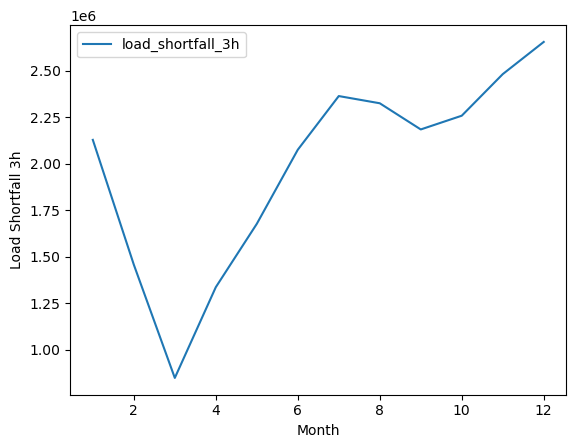

In [160]:

# Your code
submission_xgb.groupby([submission_xgb['time'].astype('datetime64').dt.month])['load_shortfall_3h'].sum().plot(legend=True)

# Adding labels to the axes
plt.xlabel('Month')
plt.ylabel('Load Shortfall 3h')

# Display the plot
plt.show()


1. January through May: Little load shortage and low demand for renewable energy.

2. June to December: Substantial load gap and increased demand for renewable electricity.



**Recommendation**

We urge that the Spanish government adopt renewable energy sources between May and December to ensure a reliable and demand-satisfying energy supply.


## Saving Our Model

In [161]:
import pickle

model_save_path = "xgb_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xgb,file)